## Assists and Plus/Minus 

## Import libraries and clean/merge the data

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [2]:
#Import Files
games = "Resources/games.csv"
games_details = "Resources/games_details.csv"
players = "Resources/players.csv"
ranking = "Resources/ranking.csv"
teams = "Resources/teams.csv"

In [3]:
# Read the data from games dataset
games_df = pd.read_csv(games)
print(games_df.shape)
pd.set_option('display.max_columns',50)
games_df.head()

(26651, 21)


,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,0.382,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
1,2022-12-22,22200478,Final,1610612762,1610612764,2022,1610612762,120.0,0.488,0.952,0.457,16.0,40.0,1610612764,112.0,0.561,0.765,0.333,20.0,37.0,1
2,2022-12-21,22200466,Final,1610612739,1610612749,2022,1610612739,114.0,0.482,0.786,0.313,22.0,37.0,1610612749,106.0,0.470,0.682,0.433,20.0,46.0,1
3,2022-12-21,22200467,Final,1610612755,1610612765,2022,1610612755,113.0,0.441,0.909,0.297,27.0,49.0,1610612765,93.0,0.392,0.735,0.261,15.0,46.0,1
4,2022-12-21,22200468,Final,1610612737,1610612741,2022,1610612737,108.0,0.429,1.000,0.378,22.0,47.0,1610612741,110.0,0.500,0.773,0.292,20.0,47.0,0


In [4]:
# Checking the date range of this data
# First finding the minimum year of this data
min_yr = games_df["SEASON"].min()

# Finding the maximum year of the data
max_yr = games_df["SEASON"].max()
print(f' This data is for NBA seasons from {min_yr} to {max_yr}')
last_game = games_df["GAME_DATE_EST"].max()
print(last_game)

#Note: the 2022 season does not go all the way through to the finals

 This data is for NBA seasons from 2003 to 2022
2022-12-22


In [5]:
# How many games do I have data from?
games_df['GAME_ID'].nunique()

26622

In [6]:
# Looking at column names and data types to get a sense of the data that is present in this games dataset
games_df.dtypes

GAME_DATE_EST        object
GAME_ID               int64
GAME_STATUS_TEXT     object
HOME_TEAM_ID          int64
VISITOR_TEAM_ID       int64
SEASON                int64
TEAM_ID_home          int64
PTS_home            float64
FG_PCT_home         float64
FT_PCT_home         float64
FG3_PCT_home        float64
AST_home            float64
REB_home            float64
TEAM_ID_away          int64
PTS_away            float64
FG_PCT_away         float64
FT_PCT_away         float64
FG3_PCT_away        float64
AST_away            float64
REB_away            float64
HOME_TEAM_WINS        int64
dtype: object

In [7]:
# Looking at unique counts to better understand this data
unique_counts = games_df.nunique()
print(unique_counts)

GAME_DATE_EST        4304
GAME_ID             26622
GAME_STATUS_TEXT        1
HOME_TEAM_ID           30
VISITOR_TEAM_ID        30
SEASON                 20
TEAM_ID_home           30
PTS_home              100
FG_PCT_home           404
FT_PCT_home           410
FG3_PCT_home          437
AST_home               42
REB_home               55
TEAM_ID_away           30
PTS_away              106
FG_PCT_away           393
FT_PCT_away           387
FG3_PCT_away          417
AST_away               41
REB_away               52
HOME_TEAM_WINS          2
dtype: int64


In [8]:
# Look at total counts to ensure there are no missing values 
print(games_df.count())

GAME_DATE_EST       26651
GAME_ID             26651
GAME_STATUS_TEXT    26651
HOME_TEAM_ID        26651
VISITOR_TEAM_ID     26651
SEASON              26651
TEAM_ID_home        26651
PTS_home            26552
FG_PCT_home         26552
FT_PCT_home         26552
FG3_PCT_home        26552
AST_home            26552
REB_home            26552
TEAM_ID_away        26651
PTS_away            26552
FG_PCT_away         26552
FT_PCT_away         26552
FG3_PCT_away        26552
AST_away            26552
REB_away            26552
HOME_TEAM_WINS      26651
dtype: int64


In [9]:
#Check for missing values
games_df[games_df["GAME_ID"].isnull()]
games_df[games_df["GAME_ID"].isna()]
games_df[games_df.isna().any(axis=1)]

#All game IDs are present. Some fields are missing values for specific games points, but these fields won't be necessary.
#We will be using individual player stats from each game played, as opposed to aggregated team values for each game. 

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
19175,2003-10-24,10300116,Final,1610612753,1610612762,2003,1610612753,NaN,NaN,NaN,NaN,NaN,NaN,1610612762,NaN,NaN,NaN,NaN,NaN,NaN,0
19176,2003-10-24,10300108,Final,1610612737,1610612764,2003,1610612737,NaN,NaN,NaN,NaN,NaN,NaN,1610612764,NaN,NaN,NaN,NaN,NaN,NaN,0
19177,2003-10-24,10300109,Final,1610612738,1610612751,2003,1610612738,NaN,NaN,NaN,NaN,NaN,NaN,1610612751,NaN,NaN,NaN,NaN,NaN,NaN,0
19178,2003-10-24,10300113,Final,1610612759,1610612745,2003,1610612759,NaN,NaN,NaN,NaN,NaN,NaN,1610612745,NaN,NaN,NaN,NaN,NaN,NaN,0
19179,2003-10-24,10300112,Final,1610612749,1610612765,2003,1610612749,NaN,NaN,NaN,NaN,NaN,NaN,1610612765,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19269,2003-10-09,10300019,Final,1610612743,1610612756,2003,1610612743,NaN,NaN,NaN,NaN,NaN,NaN,1610612756,NaN,NaN,NaN,NaN,NaN,NaN,0
19270,2003-10-09,10300022,Final,1610612757,1610612758,2003,1610612757,NaN,NaN,NaN,NaN,NaN,NaN,1610612758,NaN,NaN,NaN,NaN,NaN,NaN,0
19271,2003-10-08,10300013,Final,1610612759,1610612763,2003,1610612759,NaN,NaN,NaN,NaN,NaN,NaN,1610612763,NaN,NaN,NaN,NaN,NaN,NaN,0
19278,2003-10-08,10300015,Final,1610612747,1610612744,2003,1610612747,NaN,NaN,NaN,NaN,NaN,NaN,1610612744,NaN,NaN,NaN,NaN,NaN,NaN,0


In [10]:
# Read the data from games_details dataset
games_details_df = pd.read_csv(games_details)
# print(games_details_df.shape)
games_details_df.head()
#Ended up not needing this in the code, but it was good for understanding the data we had to work with. 

C:\Users\insul\AppData\Local\Temp\ipykernel_25328\9039546.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  games_details_df = pd.read_csv(games_details)


,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22200477,1610612759,SAS,San Antonio,1629641,Romeo Langford,Romeo,F,NaN,18:06,1.0,1.0,1.000,0.0,0.0,0.000,0.0,0.0,0.0,1.0,1.0,2.0,0.0,1.0,0.0,2.0,5.0,2.0,-2.0
1,22200477,1610612759,SAS,San Antonio,1631110,Jeremy Sochan,Jeremy,F,NaN,31:01,7.0,14.0,0.500,2.0,4.0,0.500,7.0,10.0,0.7,6.0,3.0,9.0,6.0,1.0,0.0,2.0,1.0,23.0,-14.0
2,22200477,1610612759,SAS,San Antonio,1627751,Jakob Poeltl,Jakob,C,NaN,21:42,6.0,9.0,0.667,0.0,0.0,0.000,1.0,1.0,1.0,1.0,3.0,4.0,1.0,1.0,0.0,2.0,4.0,13.0,-4.0
3,22200477,1610612759,SAS,San Antonio,1630170,Devin Vassell,Devin,G,NaN,30:20,4.0,13.0,0.308,1.0,6.0,0.167,1.0,1.0,1.0,0.0,9.0,9.0,5.0,3.0,0.0,2.0,1.0,10.0,-18.0
4,22200477,1610612759,SAS,San Antonio,1630200,Tre Jones,Tre,G,NaN,27:44,7.0,12.0,0.583,1.0,3.0,0.333,4.0,4.0,1.0,0.0,2.0,2.0,3.0,0.0,0.0,2.0,2.0,19.0,0.0


In [11]:
# Find the columns with mixed datatypes
for col in games_details_df:
    unique_types = games_details_df[col].apply(type).unique()
    if len(unique_types) > 1:
        print(col, unique_types)

NICKNAME [<class 'str'> <class 'float'>]
START_POSITION [<class 'str'> <class 'float'>]
COMMENT [<class 'float'> <class 'str'>]
MIN [<class 'str'> <class 'float'>]


In [12]:
# Look at column names and data types to get a sense of the data that is present in this games_details dataset
games_details_df.dtypes

GAME_ID                int64
TEAM_ID                int64
TEAM_ABBREVIATION     object
TEAM_CITY             object
PLAYER_ID              int64
PLAYER_NAME           object
NICKNAME              object
START_POSITION        object
COMMENT               object
MIN                   object
FGM                  float64
FGA                  float64
FG_PCT               float64
FG3M                 float64
FG3A                 float64
FG3_PCT              float64
FTM                  float64
FTA                  float64
FT_PCT               float64
OREB                 float64
DREB                 float64
REB                  float64
AST                  float64
STL                  float64
BLK                  float64
TO                   float64
PF                   float64
PTS                  float64
PLUS_MINUS           float64
dtype: object

In [13]:
# Read the data from players dataset
players_df = pd.read_csv(players)
print(players_df.shape)
players_df.head()

(7228, 4)


,PLAYER_NAME,TEAM_ID,PLAYER_ID,SEASON
0,Royce O'Neale,1610612762,1626220,2019
1,Bojan Bogdanovic,1610612762,202711,2019
2,Rudy Gobert,1610612762,203497,2019
3,Donovan Mitchell,1610612762,1628378,2019
4,Mike Conley,1610612762,201144,2019


In [14]:
# Check that the player IDs are consistent across dataframes

royce = 1626220
royce_check = games_details_df.loc[games_details_df['PLAYER_ID']== royce]
royce_check

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
165,22200470,1610612751,BKN,Brooklyn,1626220,Royce O'Neale,Royce,F,NaN,26:50,5.0,7.0,0.714,4.0,6.0,0.667,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,3.0,2.0,14.0,28.0
723,22200447,1610612751,BKN,Brooklyn,1626220,Royce O'Neale,Royce,F,NaN,31:37,4.0,6.0,0.667,3.0,4.0,0.750,0.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,1.0,3.0,11.0,-2.0
1147,22200433,1610612751,BKN,Brooklyn,1626220,Royce O'Neale,Royce,F,NaN,32.000000:29,0.0,4.0,0.000,0.0,4.0,0.000,0.0,0.0,0.0,0.0,7.0,7.0,3.0,0.0,0.0,3.0,5.0,0.0,-4.0
2385,22200380,1610612751,BKN,Brooklyn,1626220,Royce O'Neale,Royce,F,NaN,37:19,2.0,5.0,0.400,2.0,4.0,0.500,0.0,2.0,0.0,3.0,6.0,9.0,5.0,0.0,1.0,3.0,1.0,6.0,7.0
2658,22200364,1610612751,BKN,Brooklyn,1626220,Royce O'Neale,Royce,F,NaN,37:22,1.0,6.0,0.167,1.0,4.0,0.250,0.0,0.0,0.0,2.0,2.0,4.0,4.0,1.0,0.0,1.0,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481478,21700023,1610612762,UTA,Utah,1626220,Royce O'Neale,NaN,NaN,DNP - Coach's Decision,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
481825,21700010,1610612762,UTA,Utah,1626220,Royce O'Neale,NaN,NaN,DNP - Coach's Decision,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
482834,11700058,1610612762,UTA,Utah,1626220,Royce O'Neale,NaN,NaN,NaN,9:23,0.0,1.0,0.000,0.0,1.0,0.000,0.0,0.0,0.0,0.0,3.0,3.0,1.0,1.0,1.0,1.0,2.0,0.0,6.0
482914,11700047,1610612762,UTA,Utah,1626220,Royce O'Neale,NaN,NaN,NaN,6:53,2.0,4.0,0.500,1.0,3.0,0.333,0.0,0.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,5.0,-2.0


In [15]:
# Read the data from ranking dataset
ranking_df = pd.read_csv(ranking)
print(ranking_df.shape)
ranking_df.head()

(210342, 13)


,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
0,1610612743,0,22022,2022-12-22,West,Denver,30,19,11,0.633,10-3,9-8,NaN
1,1610612763,0,22022,2022-12-22,West,Memphis,30,19,11,0.633,13-2,6-9,NaN
2,1610612740,0,22022,2022-12-22,West,New Orleans,31,19,12,0.613,13-4,6-8,NaN
3,1610612756,0,22022,2022-12-22,West,Phoenix,32,19,13,0.594,14-4,5-9,NaN
4,1610612746,0,22022,2022-12-22,West,LA Clippers,33,19,14,0.576,11-7,8-7,NaN


In [16]:
# Read the data from teams dataset
teams_df = pd.read_csv(teams)
print(teams_df.shape)
teams_df.head()

(30, 14)


,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
3,0,1610612741,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711.0,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
4,0,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends


In [17]:
# Create a new dataframe and merge both game datasets
game_data_merge_df = pd.merge(games_details_df, games_df, on='GAME_ID')
print(game_data_merge_df.shape)
pd.set_option('display.max_columns',50)
display(game_data_merge_df)

(669560, 49)


,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,GAME_DATE_EST,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,22200477,1610612759,SAS,San Antonio,1629641,Romeo Langford,Romeo,F,NaN,18:06,1.0,1.0,1.000,0.0,0.0,0.000,0.0,0.0,0.000,1.0,1.0,2.0,0.0,1.0,0.0,2.0,5.0,2.0,-2.0,2022-12-22,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,0.382,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
1,22200477,1610612759,SAS,San Antonio,1631110,Jeremy Sochan,Jeremy,F,NaN,31:01,7.0,14.0,0.500,2.0,4.0,0.500,7.0,10.0,0.700,6.0,3.0,9.0,6.0,1.0,0.0,2.0,1.0,23.0,-14.0,2022-12-22,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,0.382,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
2,22200477,1610612759,SAS,San Antonio,1627751,Jakob Poeltl,Jakob,C,NaN,21:42,6.0,9.0,0.667,0.0,0.0,0.000,1.0,1.0,1.000,1.0,3.0,4.0,1.0,1.0,0.0,2.0,4.0,13.0,-4.0,2022-12-22,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,0.382,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
3,22200477,1610612759,SAS,San Antonio,1630170,Devin Vassell,Devin,G,NaN,30:20,4.0,13.0,0.308,1.0,6.0,0.167,1.0,1.0,1.000,0.0,9.0,9.0,5.0,3.0,0.0,2.0,1.0,10.0,-18.0,2022-12-22,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,0.382,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
4,22200477,1610612759,SAS,San Antonio,1630200,Tre Jones,Tre,G,NaN,27:44,7.0,12.0,0.583,1.0,3.0,0.333,4.0,4.0,1.000,0.0,2.0,2.0,3.0,0.0,0.0,2.0,2.0,19.0,0.0,2022-12-22,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,0.382,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669555,11200005,1610612743,DEN,Denver,202706,Jordan Hamilton,NaN,NaN,NaN,19,4.0,9.0,0.444,3.0,6.0,0.500,6.0,7.0,0.857,0.0,2.0,2.0,0.0,2.0,0.0,1.0,3.0,17.0,NaN,2012-10-06,Final,1610612746,1610612743,2012,1610612746,104.0,0.512,0.700,0.267,21.0,40.0,1610612743,106.0,0.532,0.615,0.471,25.0,34.0,0
669556,11200005,1610612743,DEN,Denver,202702,Kenneth Faried,NaN,NaN,NaN,23,7.0,11.0,0.636,0.0,0.0,0.000,4.0,4.0,1.000,1.0,0.0,1.0,1.0,1.0,0.0,3.0,3.0,18.0,NaN,2012-10-06,Final,1610612746,1610612743,2012,1610612746,104.0,0.512,0.700,0.267,21.0,40.0,1610612743,106.0,0.532,0.615,0.471,25.0,34.0,0
669557,11200005,1610612743,DEN,Denver,201585,Kosta Koufos,NaN,NaN,NaN,15,3.0,7.0,0.429,0.0,0.0,0.000,0.0,0.0,0.000,3.0,5.0,8.0,0.0,1.0,0.0,0.0,3.0,6.0,NaN,2012-10-06,Final,1610612746,1610612743,2012,1610612746,104.0,0.512,0.700,0.267,21.0,40.0,1610612743,106.0,0.532,0.615,0.471,25.0,34.0,0
669558,11200005,1610612743,DEN,Denver,202389,Timofey Mozgov,NaN,NaN,NaN,19,1.0,1.0,1.000,0.0,0.0,0.000,0.0,2.0,0.000,1.0,2.0,3.0,1.0,0.0,0.0,4.0,2.0,2.0,NaN,2012-10-06,Final,1610612746,1610612743,2012,1610612746,104.0,0.512,0.700,0.267,21.0,40.0,1610612743,106.0,0.532,0.615,0.471,25.0,34.0,0


In [18]:
# Columns list for new df

game_data_merge_df.columns

Index(['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID',
       'PLAYER_NAME', 'NICKNAME', 'START_POSITION', 'COMMENT', 'MIN', 'FGM',
       'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT',
       'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS',
       'PLUS_MINUS', 'GAME_DATE_EST', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID',
       'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home', 'FG_PCT_home',
       'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away',
       'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away',
       'REB_away', 'HOME_TEAM_WINS'],
      dtype='object')

In [20]:
# Create a new dataframe and merge the team and rankings data sets
team_and_rankings_df = pd.merge(teams_df, ranking_df, on='TEAM_ID')
print(team_and_rankings_df.shape)
pd.set_option('display.max_columns',50)
display(team_and_rankings_df)

(210342, 26)


,LEAGUE_ID_x,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION,LEAGUE_ID_y,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks,0,22022,2022-12-22,East,Atlanta,32,16,16,0.500,10-6,6-10,NaN
1,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks,0,22022,2022-12-21,East,Atlanta,32,16,16,0.500,10-6,6-10,NaN
2,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks,0,22022,2022-12-20,East,Atlanta,31,16,15,0.516,10-5,6-10,NaN
3,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks,0,22022,2022-12-19,East,Atlanta,31,16,15,0.516,10-5,6-10,NaN
4,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks,0,22022,2022-12-18,East,Atlanta,30,15,15,0.500,9-5,6-10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210337,0,1610612744,1946,2019,GSW,Warriors,1946,Golden State,Chase Center,19596.0,Joe Lacob,Bob Myers,Steve Kerr,Santa Cruz Warriors,0,22013,2014-09-05,West,Golden State,82,51,31,0.622,27-14,24-17,NaN
210338,0,1610612744,1946,2019,GSW,Warriors,1946,Golden State,Chase Center,19596.0,Joe Lacob,Bob Myers,Steve Kerr,Santa Cruz Warriors,0,22013,2014-09-04,West,Golden State,82,51,31,0.622,27-14,24-17,NaN
210339,0,1610612744,1946,2019,GSW,Warriors,1946,Golden State,Chase Center,19596.0,Joe Lacob,Bob Myers,Steve Kerr,Santa Cruz Warriors,0,22013,2014-09-03,West,Golden State,82,51,31,0.622,27-14,24-17,NaN
210340,0,1610612744,1946,2019,GSW,Warriors,1946,Golden State,Chase Center,19596.0,Joe Lacob,Bob Myers,Steve Kerr,Santa Cruz Warriors,0,22013,2014-09-02,West,Golden State,82,51,31,0.622,27-14,24-17,NaN


In [21]:
# Now answering our question about the most consistent players
# Our definition of 'most consistent' is 'has the smallest total standard devation in the dataset for a given stat'
# I will focus on asssits and +/- 

assists_std = games_details_df.groupby('PLAYER_ID').agg({'AST':'std', 'PLAYER_NAME':'first'}).reset_index()
assists_std

# Sort this from smallest to largest
#rebounds_std.sort_values(by='REB', ascending=True)

,PLAYER_ID,AST,PLAYER_NAME
0,15,0.793097,Eric Piatkowski
1,42,NaN,Monty Williams
2,43,1.204159,Chris Whitney
3,56,2.794257,Gary Payton
4,57,2.593490,Doug Christie
...,...,...,...
2682,1962936483,NaN,Jan Vesely
2683,1962936489,NaN,Brian Skinner
2684,1962936495,NaN,Damien Wilkins
2685,1962937755,NaN,Paige Marcus


In [22]:
#"Top Performers" must exceed these values in order to be eligible
#Total games played 
games_cutoff = 82

#Per game average minutes played across all games played
minutes_cutoff = 18


In [23]:
# Using variables to limit the players data set and checking the results of the std_dev calculation above for each

games_threshold = games_details_df['PLAYER_ID'].value_counts()
print(games_threshold)

PLAYER_ID
2544       1795
2617       1720
2738       1560
2730       1541
2594       1534
           ... 
201251        1
1629260       1
201252        1
974           1
203198        1
Name: count, Length: 2687, dtype: int64


In [24]:
# Filter out 'PLAYER_ID' values with less than 82 occurrences
valid_player_ids = games_threshold[games_threshold >= 82].index.tolist()

# Create a new DataFrame with 'PLAYER_ID's that have 82 or more occurrences
filtered_player_df = games_details_df[games_details_df['PLAYER_ID'].isin(valid_player_ids)]
filtered_player_df

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22200477,1610612759,SAS,San Antonio,1629641,Romeo Langford,Romeo,F,NaN,18:06,1.0,1.0,1.000,0.0,0.0,0.000,0.0,0.0,0.000,1.0,1.0,2.0,0.0,1.0,0.0,2.0,5.0,2.0,-2.0
2,22200477,1610612759,SAS,San Antonio,1627751,Jakob Poeltl,Jakob,C,NaN,21:42,6.0,9.0,0.667,0.0,0.0,0.000,1.0,1.0,1.000,1.0,3.0,4.0,1.0,1.0,0.0,2.0,4.0,13.0,-4.0
3,22200477,1610612759,SAS,San Antonio,1630170,Devin Vassell,Devin,G,NaN,30:20,4.0,13.0,0.308,1.0,6.0,0.167,1.0,1.0,1.000,0.0,9.0,9.0,5.0,3.0,0.0,2.0,1.0,10.0,-18.0
4,22200477,1610612759,SAS,San Antonio,1630200,Tre Jones,Tre,G,NaN,27:44,7.0,12.0,0.583,1.0,3.0,0.333,4.0,4.0,1.000,0.0,2.0,2.0,3.0,0.0,0.0,2.0,2.0,19.0,0.0
5,22200477,1610612759,SAS,San Antonio,1628380,Zach Collins,Zach,NaN,NaN,18:04,2.0,6.0,0.333,0.0,0.0,0.000,2.0,2.0,1.000,1.0,1.0,2.0,2.0,0.0,0.0,0.0,3.0,6.0,-13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668623,11200005,1610612743,DEN,Denver,202706,Jordan Hamilton,NaN,NaN,NaN,19,4.0,9.0,0.444,3.0,6.0,0.500,6.0,7.0,0.857,0.0,2.0,2.0,0.0,2.0,0.0,1.0,3.0,17.0,NaN
668624,11200005,1610612743,DEN,Denver,202702,Kenneth Faried,NaN,NaN,NaN,23,7.0,11.0,0.636,0.0,0.0,0.000,4.0,4.0,1.000,1.0,0.0,1.0,1.0,1.0,0.0,3.0,3.0,18.0,NaN
668625,11200005,1610612743,DEN,Denver,201585,Kosta Koufos,NaN,NaN,NaN,15,3.0,7.0,0.429,0.0,0.0,0.000,0.0,0.0,0.000,3.0,5.0,8.0,0.0,1.0,0.0,0.0,3.0,6.0,NaN
668626,11200005,1610612743,DEN,Denver,202389,Timofey Mozgov,NaN,NaN,NaN,19,1.0,1.0,1.000,0.0,0.0,0.000,0.0,2.0,0.000,1.0,2.0,3.0,1.0,0.0,0.0,4.0,2.0,2.0,NaN


## NBA Assists Code and Analysis

In [25]:
# Calculate assists standard dev with this limited set of players
ast_avg_filtered = filtered_player_df.groupby('PLAYER_ID').agg({'AST':'mean', 'PLAYER_NAME':'first'}).reset_index()
ast_avg_filtered = ast_avg_filtered.rename(columns={"AST": "AST_mean"})
ast_avg_filtered

# Sort this from smallest to largest to find the top performers in this category
top_performers_ast = ast_avg_filtered.sort_values(by='AST_mean', ascending=False).reset_index()
top_performers_ast.head(50)

,index,PLAYER_ID,AST_mean,PLAYER_NAME
0,93,959,10.073529,Steve Nash
1,438,101108,9.268710,Chris Paul
2,1244,1629027,8.940678,Trae Young
3,713,202322,8.787795,John Wall
4,609,201566,8.233607,Russell Westbrook
5,47,467,7.905639,Jason Kidd
6,1246,1629029,7.879056,Luka Doncic
7,523,200765,7.850515,Rajon Rondo
8,444,101114,7.807654,Deron Williams
9,1070,1627732,7.515670,Ben Simmons


In [26]:
#Find standard deviation of the top performers across assists
# Recalculating assists standard dev for just the filtered group of players (at least 82 games)
ast_std_filtered = filtered_player_df.groupby('PLAYER_ID').agg({'AST':'std', 'PLAYER_NAME':'first'}).reset_index()
#ast_std_filtered.rename(columns = {"PLAYER_NAME":"Player"})
ast_std_filtered = ast_std_filtered.rename(columns = {"AST":"AST_std"})
ast_std_filtered

,PLAYER_ID,AST_std,PLAYER_NAME
0,15,0.793097,Eric Piatkowski
1,56,2.794257,Gary Payton
2,57,2.593490,Doug Christie
3,72,1.902608,Kenny Anderson
4,84,1.936059,Latrell Sprewell
...,...,...,...
1442,1630613,1.530114,Duane Washington Jr.
1443,1630625,1.553718,Dalano Banton
1444,1630631,2.073679,Jose Alvarado
1445,1630678,1.088823,Terry Taylor


In [27]:
#Display the standard dev results for the top 50 players by mean
# top_performers_ast_std = ast_std_filtered[ast_std_filtered["PLAYER_ID"].isin()]
#Can I show standard dev and average in the same dataframe?
combined_ast = pd.merge(ast_avg_filtered, ast_std_filtered, on=["PLAYER_ID","PLAYER_NAME"])
combined_ast = combined_ast[["PLAYER_ID","PLAYER_NAME","AST_mean","AST_std"]]
combined_ast = combined_ast.sort_values(by='AST_mean', ascending=False).reset_index()

# Sort this from largest to smallest
top_performers_ast = combined_ast.iloc[:50]
top_performers_ast.head(52)

,index,PLAYER_ID,PLAYER_NAME,AST_mean,AST_std
0,93,959,Steve Nash,10.073529,3.876961
1,438,101108,Chris Paul,9.268710,3.473118
2,1244,1629027,Trae Young,8.940678,3.347552
3,713,202322,John Wall,8.787795,3.454171
4,609,201566,Russell Westbrook,8.233607,3.737975
5,47,467,Jason Kidd,7.905639,3.657935
6,1246,1629029,Luka Doncic,7.879056,3.456424
7,523,200765,Rajon Rondo,7.850515,4.361560
8,444,101114,Deron Williams,7.807654,3.871716
9,1070,1627732,Ben Simmons,7.515670,3.016935


In [28]:
most_consistent_ast = combined_ast.sort_values(by='AST_std', ascending=True).reset_index()
most_consistent_ast.head(50)

,level_0,index,PLAYER_ID,PLAYER_NAME,AST_mean,AST_std
0,1446,512,200754,Mouhamed Sene,0.016949,0.130189
1,1445,552,200818,Justin Williams,0.049180,0.218039
2,1444,169,1743,Bruno Sundov,0.100000,0.305129
3,1443,173,1751,Jahidi White,0.105882,0.309513
4,1442,559,201043,Randolph Morris,0.108696,0.312963
5,1439,141,1565,Michael Stewart,0.121951,0.331295
6,1441,122,1504,Danny Fortson,0.112994,0.334903
7,1437,1364,1630176,Vernon Carey Jr.,0.131579,0.342570
8,1435,305,2409,Marcus Haislip,0.137931,0.347839
9,1436,658,201934,Hasheem Thabeet,0.132296,0.372397


In [29]:
top_performers_ast.to_csv("Resources/Top_Performers_Assists.csv", index=False)
combined_ast.to_csv("Resources/Filered_Players_Assists.csv", index=False)

In [30]:
#Calculate t-test for the top 50 players compared to the population
top_performers_ast_std = top_performers_ast["AST_std"]
combined_ast_std = combined_ast["AST_std"]

#Calculate mean of top 50 and League
top_performers_ast_mean = top_performers_ast["AST_mean"]
combined_ast_mean = combined_ast["AST_mean"]

#st.ttest_ind(top_performers_ast_std, combined_ast_std, equal_var=False)
st.ttest_1samp(top_performers_ast_std, combined_ast_std.mean())

TtestResult(statistic=29.57009473337322, pvalue=6.665795600055122e-33, df=49)

Text(0, 0.5, 'Occurrences')

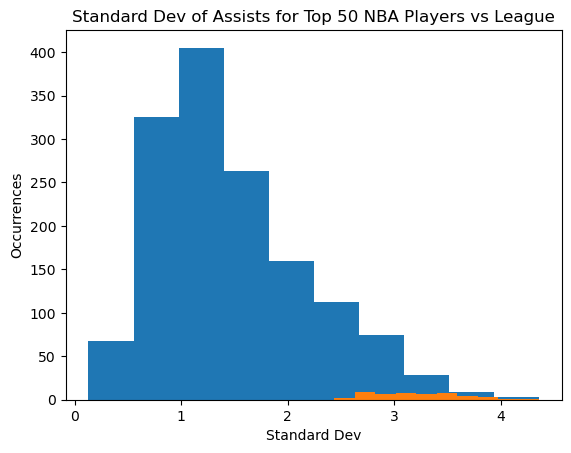

In [31]:
pop_graph = plt.hist(combined_ast_std)
top_graph = plt.hist(top_performers_ast_std)
plt.title("Standard Dev of Assists for Top 50 NBA Players vs League")
plt.xlabel("Standard Dev")
plt.ylabel("Occurrences")

In [32]:
#top performers summary for asssits standard dev
top_performers_ast_std.describe()

count    50.000000
mean      3.227611
std       0.420259
min       2.435705
25%       2.876753
50%       3.147487
75%       3.482222
max       4.361560
Name: AST_std, dtype: float64

In [33]:
#league summary for assists standard dev
combined_ast_std.describe()

count    1447.000000
mean        1.470152
std         0.711448
min         0.130189
25%         0.947592
50%         1.301198
75%         1.876008
max         4.361560
Name: AST_std, dtype: float64

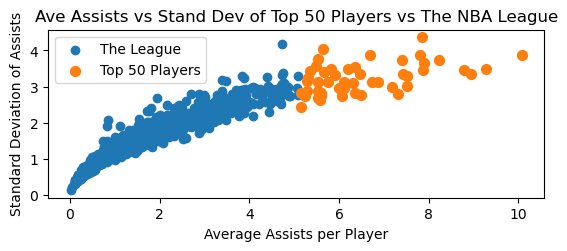

In [34]:
#Scatterplot: Top 50 and rest of league for assists
plt.subplot(2, 1, 1)
plt.scatter(combined_ast_mean,combined_ast_std, label="The League")
plt.scatter(top_performers_ast_mean, top_performers_ast_std, label="Top 50 Players", s=50)
plt.legend()
plt.title("Ave Assists vs Stand Dev of Top 50 Players vs The NBA League")
plt.xlabel("Average Assists per Player")
plt.ylabel("Standard Deviation of Assists")
plt.show()

The r-value is: 0.8776369722036518


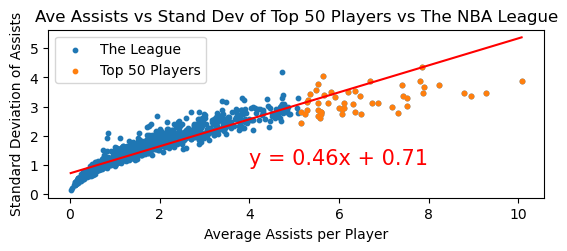

In [35]:
#Scatterplot and Linear Regression: 
plt.subplot(2, 1, 1)
plt.scatter(combined_ast_mean,combined_ast_std, label="The League", s=10)
plt.scatter(top_performers_ast_mean, top_performers_ast_std, label="Top 50 Players", s=10)
plt.legend()
plt.title("Ave Assists vs Stand Dev of Top 50 Players vs The NBA League")
plt.xlabel("Average Assists per Player")
plt.ylabel("Standard Deviation of Assists")

x_values = combined_ast_mean
y_values = combined_ast_std

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (4,1), fontsize=15, color="red")
print(f"The r-value is: {rvalue**2}")

plt
#Save File and Display
plt.savefig("Output/Assists_Scatter_LinRegress.png")
plt.show()

### Analysis: Assists
Compared to the rest of the league, the top 50 NBA players in the category of assists have a higher overall average assists per game. Likewise, they also have a larger average standard deviation compared to the rest of the league, with an average standard deviation of 3.2 assists compared to 1.5 assists for the rest of the league. 

However, when looking at a linear regression for the league as a whole, the top 50 NBA players for assists actually fall below the line, indicating that if the rest of the league were putting up the strong numbers that the top 50 performer were, their spread (standard deviation) would be even higher. 

Therefore, it appears that the top 50 NBA players are actually more consistent than the rest of the league in terms of assists per game. 


## NBA +/-  Code and Analysis

In [36]:
#Perform same calculations for +/- across league
#Calculating +/- standard dev with this limited set of players
plusminus_avg_filtered = filtered_player_df.groupby('PLAYER_ID').agg({'PLUS_MINUS':'mean', 'PLAYER_NAME':'first'}).reset_index()
plusminus_avg_filtered = plusminus_avg_filtered.rename(columns={"PLUS_MINUS": "PLUS_MINUS_mean"})
plusminus_avg_filtered

# Sort this from smallest to largest to find the top performers in this category
top_performers_plusminus = plusminus_avg_filtered.sort_values(by='PLUS_MINUS_mean', ascending=False).reset_index()
top_performers_plusminus.head(50)

,index,PLAYER_ID,PLUS_MINUS_mean,PLAYER_NAME
0,663,201939,6.489362,Stephen Curry
1,780,202695,6.088353,Kawhi Leonard
2,114,1495,5.770390,Tim Duncan
3,852,203110,5.689310,Draymond Green
4,992,203954,5.551807,Joel Embiid
5,776,202691,5.486423,Klay Thompson
6,1141,1628369,5.111111,Jayson Tatum
7,210,1938,5.090909,Manu Ginobili
8,338,2544,5.015421,LeBron James
9,93,959,4.636253,Steve Nash


In [37]:
#Find standard deviation of the top performers across +/-
# Recalculating +/- standard dev for just the filtered group of players (at least 82 games)
plusminus_std_filtered = filtered_player_df.groupby('PLAYER_ID').agg({'PLUS_MINUS':'std', 'PLAYER_NAME':'first'}).reset_index()
#ast_std_filtered.rename(columns = {"PLAYER_NAME":"Player"})
plusminus_std_filtered = plusminus_std_filtered.rename(columns = {"PLUS_MINUS":"PLUS_MINUS_std"})
plusminus_std_filtered

,PLAYER_ID,PLUS_MINUS_std,PLAYER_NAME
0,15,7.556884,Eric Piatkowski
1,56,11.521627,Gary Payton
2,57,11.295655,Doug Christie
3,72,10.166634,Kenny Anderson
4,84,11.409443,Latrell Sprewell
...,...,...,...
1442,1630613,8.013645,Duane Washington Jr.
1443,1630625,8.411746,Dalano Banton
1444,1630631,9.923455,Jose Alvarado
1445,1630678,9.370919,Terry Taylor


In [38]:
#Display the standard dev results for the top 50 players by mean
#Combine standard dev and average into one dataframe
combined_plusminus = pd.merge(plusminus_avg_filtered, plusminus_std_filtered, on=["PLAYER_ID","PLAYER_NAME"])
combined_plusminus = combined_plusminus[["PLAYER_ID","PLAYER_NAME","PLUS_MINUS_mean","PLUS_MINUS_std"]]
combined_plusminus = combined_plusminus.sort_values(by='PLUS_MINUS_mean', ascending=False).reset_index()

# Sort this from largest to smallest
top_performers_plusminus = combined_plusminus.iloc[:50]
top_performers_plusminus

,index,PLAYER_ID,PLAYER_NAME,PLUS_MINUS_mean,PLUS_MINUS_std
0,663,201939,Stephen Curry,6.489362,14.165745
1,780,202695,Kawhi Leonard,6.088353,12.411627
2,114,1495,Tim Duncan,5.770390,11.771770
3,852,203110,Draymond Green,5.689310,13.801924
4,992,203954,Joel Embiid,5.551807,12.520576
5,776,202691,Klay Thompson,5.486423,13.530964
6,1141,1628369,Jayson Tatum,5.111111,13.065925
7,210,1938,Manu Ginobili,5.090909,11.096973
8,338,2544,LeBron James,5.015421,12.881279
9,93,959,Steve Nash,4.636253,12.498781


In [39]:
most_consistent_plusminus = combined_plusminus.sort_values(by='PLUS_MINUS_std', ascending=True).reset_index()
most_consistent_plusminus.head(50)

,level_0,index,PLAYER_ID,PLAYER_NAME,PLUS_MINUS_mean,PLUS_MINUS_std
0,464,922,203502,Tony Mitchell,-0.041667,3.723943
1,1254,929,203513,Erik Murphy,-2.178571,4.208048
2,414,204,1917,Wang Zhi-zhi,0.102564,4.476811
3,1008,879,203162,Ben Hansbrough,-1.352941,4.518530
4,1055,423,2775,Ha Ha,-1.456522,4.539733
5,868,601,201207,Coby Karl,-1.000000,4.555217
6,287,1095,1627762,Joel Bolomboy,0.615385,4.596320
7,908,107,1032,Darvin Ham,-1.109489,4.610855
8,657,1125,1627849,Daniel Ochefu,-0.516129,4.617871
9,1220,558,200978,Jeremy Richardson,-1.938776,4.762738


In [40]:
top_performers_plusminus.to_csv("Resources/Top_Performers_Plus_Minus.csv", index=False)
combined_plusminus.to_csv("Resources/Filered_Players_Plus_Minus.csv", index=False)

In [41]:
#Calculate t-test for the top 50 players compared to the population
top_performers_plusminus_std = top_performers_plusminus["PLUS_MINUS_std"]
combined_plusminus_std = combined_plusminus["PLUS_MINUS_std"]

#Gather mean of Top 50 and League
top_performers_plusminus_mean = top_performers_plusminus["PLUS_MINUS_mean"]
combined_plusminus_mean = combined_plusminus["PLUS_MINUS_mean"]

#st.ttest_ind(top_performers_ast_std, combined_ast_std, equal_var=False)
st.ttest_1samp(top_performers_plusminus_std, combined_plusminus_std.mean())

TtestResult(statistic=18.442338607718867, pvalue=1.0849116224737197e-23, df=49)

Text(0, 0.5, 'Occurrences')

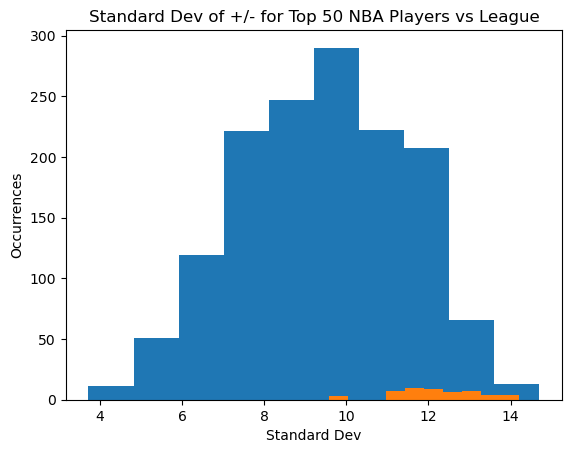

In [42]:
#Plot Histogram of Top 50 vs the League
pop_graph = plt.hist(combined_plusminus_std)
top_graph = plt.hist(top_performers_plusminus_std)
plt.title("Standard Dev of +/- for Top 50 NBA Players vs League")
plt.xlabel("Standard Dev")
plt.ylabel("Occurrences")

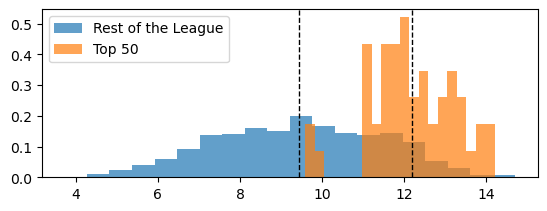

In [43]:
 # Histogram Plot of Data
plt.subplot(2, 1, 2)
plt.hist(combined_plusminus_std, 20, density=True, alpha=0.7, label="Rest of the League")
plt.hist(top_performers_plusminus_std, 20, density=True, alpha=0.7, label="Top 50")
plt.axvline(combined_plusminus_std.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(top_performers_plusminus_std.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend()

In [44]:
#top performers summary for +/- standard dev
top_performers_plusminus_std.describe()

count    50.000000
mean     12.185614
std       1.053787
min       9.589872
25%      11.501523
50%      12.072460
75%      13.002004
max      14.198688
Name: PLUS_MINUS_std, dtype: float64

In [45]:
#league summary for assists standard dev
combined_plusminus_std.describe()

count    1447.000000
mean        9.437188
std         2.029340
min         3.723943
25%         7.932960
50%         9.481679
75%        11.050214
max        14.701199
Name: PLUS_MINUS_std, dtype: float64

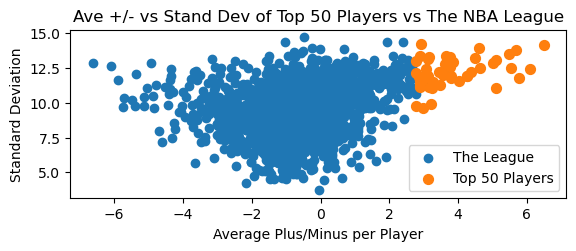

In [46]:
#Scatterplot: Top 50 and rest of league
plt.subplot(2, 1, 1)
plt.scatter(combined_plusminus_mean,combined_plusminus_std, label="The League")
plt.scatter(top_performers_plusminus_mean, top_performers_plusminus_std, label="Top 50 Players", s=50)
plt.legend()
plt.title("Ave +/- vs Stand Dev of Top 50 Players vs The NBA League")
plt.xlabel("Average Plus/Minus per Player")
plt.ylabel("Standard Deviation")
plt.show()

The r-value is: 0.09904870832951661


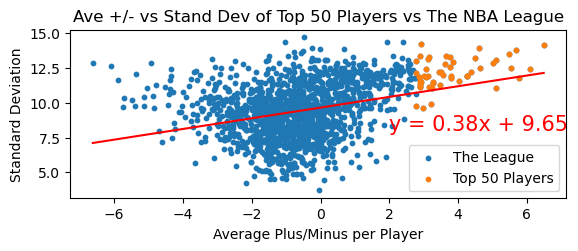

In [47]:
#Add linear regression to plot
plt.subplot(2, 1, 1)
plt.scatter(combined_plusminus_mean,combined_plusminus_std, label="The League", s = 10)
plt.scatter(top_performers_plusminus_mean, top_performers_plusminus_std, label="Top 50 Players", s=10)
plt.legend()
plt.title("Ave +/- vs Stand Dev of Top 50 Players vs The NBA League")
plt.xlabel("Average Plus/Minus per Player")
plt.ylabel("Standard Deviation")

x_values = combined_plusminus_mean
y_values = combined_plusminus_std

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (2,8), fontsize=15, color="red")
print(f"The r-value is: {rvalue**2}")

#Save file and display
plt.savefig("Output/PlusMinus_Scatter_LinRegress.png")
plt.show()

### Analysis: +/-
The top 50 NBA players in +/- value per game have a higher standard deviation for +/- per game compared to the rest of the league. The average +/- standard deviation for the top 50 is 12.2, compared to 9.4 for the rest of the league. Additionally, when looking at a linear regression of the league as a whole, the top 50 NBA players are mostly above the line, indicating that they would still have a higher standard deviation if the rest of the league were performing at their level.

This means that the top 50 players have higher variability from game to game, despite overall performing much better than the rest of the league. The rest of the league is more consistently bad than the best are consistently good. 
